According to [1] the transverse vibrational frequencies of a free standing circular plate are given by the following eigen-value equation (1):

$\frac{\lambda^2J_{n}(\lambda) + (1 - \nu)[{\lambda}J'_{n}(\lambda) - n^2J_{n}(\lambda)]}{\lambda^2I_{n}(\lambda) - (1 - \nu)[{\lambda}I'_{n}(\lambda) - n^2I_{n}(\lambda)]}$ = $\frac{\lambda^3I'_{n}(\lambda) + (1 - \nu)n^2[{\lambda}J'_{n}(\lambda) - J_{n}(\lambda)]}{\lambda^3I'_{n}(\lambda) - (1 - \nu)n^2[{\lambda}I'_{n}(\lambda) - I_{n}(\lambda)]}$

J - Bessel function of the first kind.

I - Modified Bessel function of the first kind. 

$\lambda$ - Is a unitless parameter proportional to physical constants of the system and the radius at which the vibrations are evaluated.

$\nu$ - Is Poisson's ratio.


Unfortunately, equation (1) seems to be unstable numerically (or maybe incorrect? it looks nowhere near the approximation...) and I haven't been able to compute solutions to it. However, the same reference gives an approximate version of (1), which is accurate for $\lambda >> n$. This is given as (2)


$\frac{J_n(\lambda)}{J'_n(\lambda)} = \frac{[\lambda^2 + 2(1 - \nu)n^2][I_n(\lambda)/I_n'(\lambda)] - 2\lambda(1 - \nu)}{\lambda^2 - 2(1 - \nu)n^2}$


This is the equation we solve to find the eigen-frequencies.


References:

[1] Vibration of Plates, Leissa, NASA SP-160
https://ntrs.nasa.gov/archive/nasa/casi.ntrs.nasa.gov/19700009156.pdf
equation 2.14 & 2.15

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sps
import scipy.optimize as spo
from scipy.signal import find_peaks_cwt
%matplotlib inline

In [5]:
# Bessel function of the first kind of order v, argument z, n'th derivative: jvp(v,z,n)
jvp = sps.jvp

# Modified Bessel function of the first kind of order v, argument z, n'th derivative: ivp(v,z,n)
ivp = sps.ivp

# Build the RHS and LHS of eq (2.14):
#noml = lambda ll, n, nu: (ll**2)*jvp(n, ll, 0) + (1 - nu)*(ll*jvp(n, ll, 1) - jvp(n, ll, 0)*n**2)
#denoml = lambda ll, n, nu: (ll**2)*ivp(n, ll, 0) - (1 - nu)*(ll*ivp(n, ll, 1) - ivp(n, ll, 0)*n**2)
#nomr = lambda ll, n, nu: (ll**3)*ivp(n, ll, 1) + (1 - nu)*(ll*jvp(n, ll, 1) - jvp(n, ll, 0))*n**2
#denomr = lambda ll, n, nu: (ll**3)*ivp(n, ll, 1) - (1 - nu)*(ll*ivp(n, ll, 1) - ivp(n, ll, 0))*n**2
#lhs = lambda ll, n, nu: noml(ll,n,nu)*denomr(ll,n,nu)
#rhs = lambda ll, n, nu: nomr(ll,n,nu)*denoml(ll,n,nu)

# Build the RHS and LHS of eq (2.15):
lhs = lambda ll, n, nu: jvp(n,ll,0)*(ll**2 - 2*(1 - nu)*n**2)
rhs = lambda ll, n, nu: jvp(n,ll,1)*((ll**2 + 2*(1 - nu)*n**2)*(ivp(n,ll,0)/ivp(n,ll,1)) - 2*ll*(1 - nu))

# And finally the eigen-value equation is lhs - rhs = 0
eigen_equation = lambda ll, n, nu: lhs(ll, n, nu) - rhs(ll, n, nu)


AttributeError: 'AxesSubplot' object has no attribute 'x_lim'

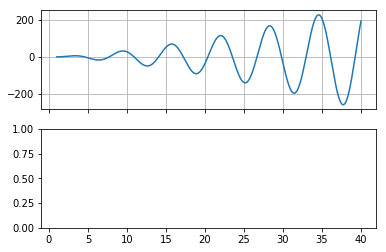

In [9]:
lam = np.linspace(1, 40, 1000)
N = 1
nu = 0.33


make_roots_pop = 1/eigen_equation(lam, N, nu)**2
suspected_roots = find_peaks_cwt(make_roots_pop, np.arange(10, 40))

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(lam, eigen_equation(lam, N, nu))
ax1.grid()
ax1.x_lim(1, 40)
ax2.semilogy(lam, make_roots_pop)
for x in suspected_roots:
    ax2.axvline(lam[x], color='r', ls='--')
ax2.grid()



In [4]:
sols = spo.fsolve(lambda x: eigen_equation(x,N,nu), lam[suspected_roots])
print(np.sort(sols)**2)
print(eigen_equation(sols, N, nu))

[    1.78719654    20.58235922    59.88200642   119.01987992   197.93179557
   296.598987     415.01412435   553.17375348   711.07603139   888.71988406
  1086.10464292  1303.22986984  1540.09526567]
[  1.17983553e-08  -1.38359280e-09   3.51771945e-10  -2.98427949e-12
   1.00399689e-11  -1.21744392e-10   7.25734139e-10  -7.10542736e-14
   9.17168563e-11  -6.31104058e-10   3.97818667e-10  -2.49741561e-10
   4.26325641e-12]
